## FERM 515 – Fixed Income in Emerging Markets Group Project
### Project by : Nafiz Emir Eğilli, Burak Kargın, Ziya Yiğit Atalay
------------------------------------------

### Use the bond data set provided (EM_Eurobond_Prices.xlsx), choose one country and one point in time (a specific day in history), and apply the following steps:
### Choose one of the term-structure models below:
- Nelson-Siegel
- Nelson-Siegel-Svensson
- Vasicek
- CIR


### 1) Generate the yield curve using the model that you choose. Provide the model parameters, explain your model, your calculations and assumptions. 

We choose Brazil on date "2005-01-03" along with Nelson-Siegel Model.

$ y(t) = \beta_0 + \beta_1 \left( \frac{1 - e^{-\lambda t}}{\lambda t} \right) + \beta_2 \left( \frac{1 - e^{-\lambda t}}{\lambda t} - e^{-\lambda t} \right) $

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data from Excel workbook
bond_prices_df = pd.read_excel("EM_Eurobond_Prices.xlsx")

# Filter the data for Brazil on the specific date "2005-01-03"
filtered_data = bond_prices_df[(bond_prices_df['Country'] == 'BRAZIL') & 
                                      (bond_prices_df['Date'] == '2005-01-03')]

# Display the filtered data
filtered_data

,Identifier,Date,PX_LAST,PX_BID,PX_ASK,Yield,PX_DIRTY_BID,PX_DIRTY_ASK,Country,Coupon,Maturity,Freq,Currency,Rating,Issue_Date,ISIN
0,EC1909489,2005-01-03,133.322,133.141,133.503,6.303,136.403,136.765,BRAZIL,14.500,2009-10-15,2,USD,NR,1999-10-25,US105756AJ93
1,EC2191467,2005-01-03,135.342,135.111,135.572,8.532,141.167,141.628,BRAZIL,12.750,2020-01-15,2,USD,NR,2000-01-26,US105756AK66
2,EC2763737,2005-01-03,115.239,115.089,115.389,4.836,120.089,120.389,BRAZIL,11.250,2007-07-26,2,USD,NR,2000-07-26,US105756AM23
3,EC3293262,2005-01-03,106.640,106.515,106.765,3.524,111.498,111.748,BRAZIL,10.250,2006-01-11,2,USD,NR,2001-01-11,US105756AQ37
4,EC3892188,2005-01-03,103.350,103.300,103.400,3.138,107.872,107.972,BRAZIL,9.625,2005-07-15,2,USD,NR,2001-05-17,US105756AS92
5,EC5035497,2005-01-03,121.456,121.206,121.706,7.067,126.553,127.053,BRAZIL,11.000,2012-01-11,2,USD,NR,2002-01-11,US105756AT75
6,EC5328124,2005-01-03,117.615,117.415,117.815,5.397,121.057,121.457,BRAZIL,11.500,2008-03-12,2,USD,NR,2002-03-12,US105756AU49
7,EC5519086,2005-01-03,123.883,123.683,124.083,6.565,126.383,126.783,BRAZIL,12.000,2010-04-15,2,USD,BBB-,2002-04-16,US105756AV22
8,EC9609677,2005-01-03,110.814,110.664,110.964,4.368,115.386,115.686,BRAZIL,10.000,2007-01-16,2,USD,BB,2003-05-06,US105756AW05
9,ED0135662,2005-01-03,117.971,117.771,118.171,7.355,118.312,118.712,BRAZIL,10.250,2013-06-17,2,USD,NR,2003-06-17,US105756AX87


In [3]:
# Function to calculate years to maturity
def calculate_years_to_maturity(maturity_date, reference_date):
    return (maturity_date - reference_date).days / 365.25

# Reference date for the analysis
reference_date = datetime.strptime("2005-01-03", "%Y-%m-%d")

# Calculate years to maturity
filtered_data['Years_to_Maturity'] = pd.to_datetime(filtered_data['Maturity']).apply(lambda x: calculate_years_to_maturity(x, reference_date))

# Extract the necessary columns
filtered_data_cols = filtered_data[['Years_to_Maturity', 'Yield']]
filtered_data_cols

,Years_to_Maturity,Yield
0,4.780287,6.303
1,15.030801,8.532
2,2.557153,4.836
3,1.021218,3.524
4,0.528405,3.138
5,7.019849,7.067
6,3.186858,5.397
7,5.278576,6.565
8,2.034223,4.368
9,8.451745,7.355


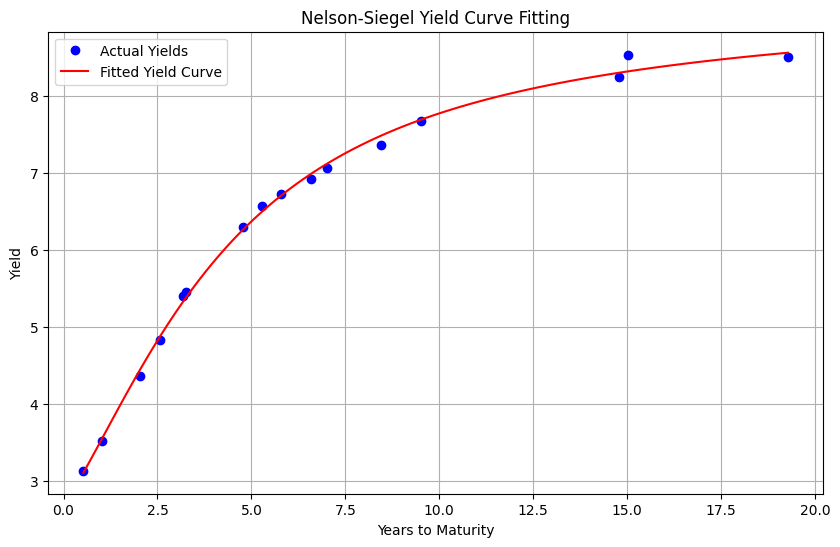

β0 = 9.41, β1 = -6.73, β2 = -4.63, λ = 0.69


In [4]:
# Nelson-Siegel model function
def nelson_siegel(t, beta0, beta1, beta2, lambda_):
    return beta0 + beta1 * (1 - np.exp(-lambda_ * t)) / (lambda_ * t) + beta2 * ((1 - np.exp(-lambda_ * t)) / (lambda_ * t) - np.exp(-lambda_ * t))

# Extracting years to maturity and yields
t = filtered_data_cols['Years_to_Maturity'].values
y = filtered_data_cols['Yield'].values

# Initial parameter guesses for beta0, beta1, beta2, and lambda
initial_guess = [0.03, -0.02, 0.02, 0.1]

# Fit the Nelson-Siegel model
params, params_covariance = curve_fit(nelson_siegel, t, y, p0=initial_guess, maxfev=10000)

# Generate a range of maturity values for plotting the yield curve
t_fit = np.linspace(min(t), max(t), 100)
fitted_yields = nelson_siegel(t_fit, *params)

# Plot the actual vs fitted yields
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'bo', label='Actual Yields')
plt.plot(t_fit, fitted_yields, 'r-', label='Fitted Yield Curve')
plt.xlabel('Years to Maturity')
plt.ylabel('Yield')
plt.title('Nelson-Siegel Yield Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"β0 = {params[0]:.2f}, β1 = {params[1]:.2f}, β2 = {params[2]:.2f}, λ = {params[3]:.2f}")

### 2) Calculate the duration and convexity of the bonds in your sample. 

Macaulay Duration:
### $ D_M = \frac{\sum_{i=1}^{n} \frac{C_i \cdot t_i}{(1 + y/k)^{k \cdot t_i}}}{P} $

Modified Duration:
### $ D_{\text{mod}} = \frac{D_M}{1 + \frac{y}{k}} $

Convexity:
### $ \text{Convexity} = \frac{\sum_{i=1}^{n} \frac{C_i \cdot t_i \cdot (t_i + 1)}{(1 + y/k)^{k \cdot t_i}}}{P \cdot (1 + y/k)^2} $

In [5]:
# Calculate Macaulay Duration, Modified Duration, and Convexity
def calculate_duration_convexity(row):
    y = row['Yield'] / 100  # Yield to maturity
    C = row['Coupon'] / 100 * row['PX_LAST']  # Coupon payment
    P = row['PX_LAST']  # Current bond price
    M = 100  # Assuming face value is 100
    n = row['Years_to_Maturity'] * row['Freq']  # Number of periods
    t = np.arange(1, n + 1) / row['Freq']  # Time periods in years

    # Macaulay Duration
    cash_flows = np.full_like(t, C)  # All periods have the same coupon payment
    cash_flows[-1] += M  # Add the face value to the last period
    discounted_cash_flows = cash_flows / (1 + y / row['Freq'])**(row['Freq'] * t)
    D_M = np.sum(discounted_cash_flows * t) / P

    # Modified Duration
    D_mod = D_M / (1 + y / row['Freq'])

    # Convexity
    convexity_cash_flows = discounted_cash_flows * t * (t + 1)
    convexity = np.sum(convexity_cash_flows) / (P * (1 + y / row['Freq'])**2)

    return pd.Series([D_M, D_mod, convexity])

# Apply the function to each row
filtered_data[['Macaulay_Duration', 'Modified_Duration', 'Convexity']] = filtered_data.apply(calculate_duration_convexity, axis=1)

# Display the results
filtered_data[['Identifier', 'Macaulay_Duration', 'Modified_Duration', 'Convexity']]

,Identifier,Macaulay_Duration,Modified_Duration,Convexity
0,EC1909489,5.968303,5.785958,28.830455
1,EC2191467,16.969228,16.274939,178.215327
2,EC2763737,3.321360,3.242945,11.791598
3,EC3293262,1.630039,1.601815,3.838773
4,EC3892188,1.078604,1.061942,2.068110
5,EC5035497,8.315822,8.032011,54.795422
6,EC5328124,3.880590,3.778624,15.165238
7,EC5519086,6.215390,6.017854,32.676890
8,EC9609677,2.718159,2.660063,8.657444
9,ED0135662,9.103166,8.780272,66.009569


### 3) Apply a relative value trading strategy by buying a group of bonds that are cheap and selling a group of bonds which are expensive relative to your curve. 

In [6]:
# Calculate the fitted yields for the existing maturities
fitted_yields_at_maturities = nelson_siegel(t, *params)

# Add the fitted yields to the DataFrame
filtered_data['Fitted_Yield'] = fitted_yields_at_maturities

# Calculate the yield deviation
filtered_data['Yield_Deviation'] = filtered_data['Yield'] - filtered_data['Fitted_Yield']

# Classify bonds as cheap or expensive based on the yield deviation
# A positive deviation means the bond is cheap, a negative deviation means the bond is expensive
filtered_data['Classification'] = filtered_data['Yield_Deviation'].apply(lambda x: 'Cheap' if x > 0 else 'Expensive')

# Display the classified bonds
cheap_bonds = filtered_data[filtered_data['Classification'] == 'Cheap']
expensive_bonds = filtered_data[filtered_data['Classification'] == 'Expensive']

# Display the results
print("Cheap Bonds:")
print(cheap_bonds[['Identifier', 'Years_to_Maturity', 'Yield', 'Fitted_Yield', 'Yield_Deviation']])
print("\nExpensive Bonds:")
print(expensive_bonds[['Identifier', 'Years_to_Maturity', 'Yield', 'Fitted_Yield', 'Yield_Deviation']])

# Relative Value Trading Strategy
def relative_value_trading_strategy(cheap_bonds, expensive_bonds, amount=1000000):
    # Assume equal investment in each bond in the group
    num_cheap_bonds = len(cheap_bonds)
    num_expensive_bonds = len(expensive_bonds)
    
    investment_per_cheap_bond = amount / num_cheap_bonds
    investment_per_expensive_bond = amount / num_expensive_bonds
    
    cheap_bonds['Investment'] = investment_per_cheap_bond
    expensive_bonds['Investment'] = investment_per_expensive_bond
    
    return cheap_bonds, expensive_bonds

# Apply the strategy
cheap_bonds, expensive_bonds = relative_value_trading_strategy(cheap_bonds, expensive_bonds)

# Display the investment strategy
cheap_bonds['Investment'] = cheap_bonds['Investment'].apply(lambda x: f"{x:.2f}")
expensive_bonds['Investment'] = expensive_bonds['Investment'].apply(lambda x: f"{x:.2f}")

print("\nInvestment in Cheap Bonds:")
print(cheap_bonds[['Identifier', 'Investment']])
print("\nInvestment in Expensive Bonds:")
print(expensive_bonds[['Identifier', 'Investment']])

Cheap Bonds:
   Identifier  Years_to_Maturity  Yield  Fitted_Yield  Yield_Deviation
0   EC1909489           4.780287  6.303      6.264319         0.038681
1   EC2191467          15.030801  8.532      8.315876         0.216124
4   EC3892188           0.528405  3.138      3.109466         0.028534
6   EC5328124           3.186858  5.397      5.331128         0.065872
7   EC5519086           5.278576  6.565      6.494096         0.070904
12  ED1891552           5.798768  6.720      6.707552         0.012448
15  TT1301338           3.258042  5.449      5.379960         0.069040

Expensive Bonds:
   Identifier  Years_to_Maturity  Yield  Fitted_Yield  Yield_Deviation
2   EC2763737           2.557153  4.836      4.868615        -0.032615
3   EC3293262           1.021218  3.524      3.548421        -0.024421
5   EC5035497           7.019849  7.067      7.119806        -0.052806
8   EC9609677           2.034223  4.368      4.444450        -0.076450
9   ED0135662           8.451745  7.355      7

--------------------------------------------------------
- Calculate Fitted Yields: We use the Nelson-Siegel model parameters to calculate the fitted yields for the existing maturities.
- Calculate Yield Deviation: The difference between the actual yield and the fitted yield gives the yield deviation.
- Classify Bonds: Bonds are classified as cheap if the yield deviation is positive and expensive if the yield deviation is negative.
- Relative Value Trading Strategy: We assume an equal investment amount in each bond in the cheap and expensive groups. The function relative_value_trading_strategy calculates the investment per bond based on the number of bonds in each group.

### 4) Select the date on (a specific day later in history) and calculate the approximate P&L of your trading strategy for this period.
### a) Evaluate the performance of the trading strategy. Calculate the P&L using both duration and convexity measures as well as the observed prices on the later date. Discuss your observations.
### b) Examine the change in the yield curve shape between the dates you have chosen. Give some evidence on the type of yield curve shift that you observed. 
### c) Discuss the potential factors (macroeconomic, financial, technical, etc.) that could explain the yield curve shift between these dates for the chosen country. Provide your opinion.

Let's set the date as "2006-01-03" and fetch the data

In [7]:
# Load the data from the 'BOND_PRICES' sheet for the new date
later_date_data = bond_prices_df[bond_prices_df['Date'] == '2006-01-03']

# Filter for the same bonds
later_date_data = later_date_data[later_date_data['Identifier'].isin(filtered_data['Identifier'])]

# Calculate years to maturity for the new date
reference_date_new = datetime.strptime("2006-01-03", "%Y-%m-%d")
later_date_data['Years_to_Maturity'] = pd.to_datetime(later_date_data['Maturity']).apply(lambda x: calculate_years_to_maturity(x, reference_date_new))

# Display the data for verification
print(later_date_data)

      Identifier       Date  PX_LAST   PX_BID   PX_ASK  Yield  PX_DIRTY_BID  \
21223  EC1909489 2006-01-03  128.525  128.400  128.650  5.945       131.663   
21224  EC2191467 2006-01-03  145.125  145.000  145.250  7.495       151.056   
21226  EC2763737 2006-01-03  108.685  108.585  108.785  5.352       113.585   
21227  EC3293262 2006-01-03  100.105  100.103  100.108  2.560       105.086   
21228  EC5035497 2006-01-03  122.505  122.380  122.630  6.428       127.727   
21229  EC5328124 2006-01-03  111.905  111.780  112.030  5.621       115.422   
21230  EC5519086 2006-01-03  122.055  121.930  122.180  6.060       124.630   
21231  EC9609677 2006-01-03  105.025  104.900  105.150  4.923       109.622   
21232  ED0135662 2006-01-03  121.505  121.380  121.630  6.553       121.921   
21233  ED0815347 2006-01-03  116.505  116.380  116.630  6.433       120.519   
21234  ED0847993 2006-01-03  112.050  111.400  112.700  7.639       113.397   
21235  ED1891552 2006-01-03  112.175  112.050  112.3

In [8]:
# Function to calculate P&L using duration and convexity measures
def calculate_pnl(row, initial_data):
    initial_row = initial_data[initial_data['Identifier'] == row['Identifier']].iloc[0]
    y_old = initial_row['Yield'] / 100
    y_new = row['Yield'] / 100
    D_mod = initial_row['Modified_Duration']
    convexity = initial_row['Convexity']
    
    # Approximate price change using duration and convexity
    price_change_approx = -D_mod * (y_new - y_old) + 0.5 * convexity * (y_new - y_old)**2
    
    # Actual price change
    price_change_actual = row['PX_LAST'] - initial_row['PX_LAST']
    
    # Calculate P&L
    pnl_approx = price_change_approx * initial_row['PX_LAST']
    pnl_actual = price_change_actual
    
    return pd.Series([pnl_approx, pnl_actual])

# Apply the function to each row
later_date_data[['PnL_Approx', 'PnL_Actual']] = later_date_data.apply(lambda row: calculate_pnl(row, filtered_data), axis=1)

# Display the results
print(later_date_data[['Identifier', 'PnL_Approx', 'PnL_Actual']])

      Identifier  PnL_Approx  PnL_Actual
21223  EC1909489    2.786228      -4.797
21224  EC2191467   24.138716       9.783
21226  EC2763737   -1.910273      -6.554
21227  EC3293262    1.665702      -6.535
21228  EC5035497    6.369548       1.049
21229  EC5328124   -0.991032      -5.710
21230  EC5519086    3.816443      -1.828
21231  EC9609677   -1.621211      -5.789
21232  ED0135662    8.557694       3.534
21233  ED0815347    4.216436       0.461
21234  ED0847993   14.739162       8.575
21235  ED1891552    3.161186       0.215
21237  ED5359572   11.071272       4.795
21238  ED6426149   12.941514       7.674
21241  TT1301338   -0.466966      -3.595


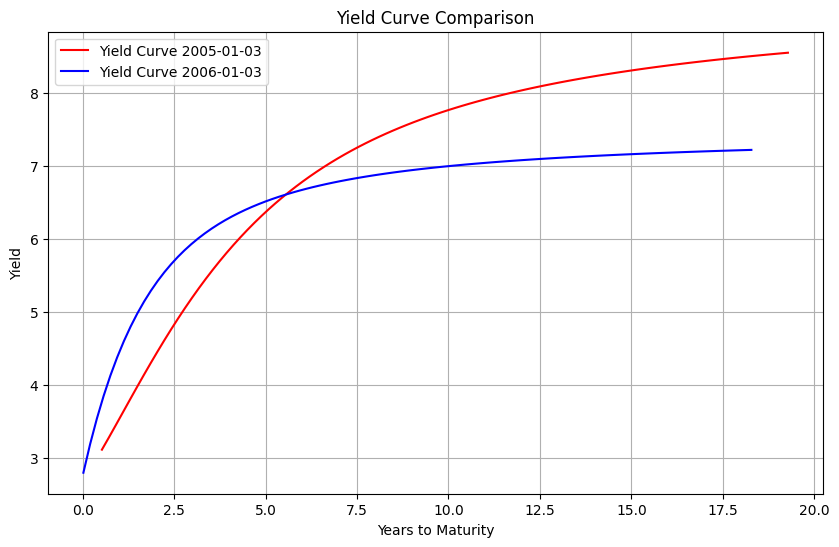

In [9]:
# Extract yields and maturities for the new date
t_new = later_date_data['Years_to_Maturity'].values
y_new = later_date_data['Yield'].values

# Fit the Nelson-Siegel model for the new date
params_new, _ = curve_fit(nelson_siegel, t_new, y_new, p0=initial_guess, maxfev=10000)

# Generate the yield curves for plotting
t_fit_new = np.linspace(min(t_new), max(t_new), 100)
fitted_yields_new = nelson_siegel(t_fit_new, *params_new)

# Plot the yield curves
plt.figure(figsize=(10, 6))
plt.plot(t_fit, fitted_yields, 'r-', label='Yield Curve 2005-01-03')
plt.plot(t_fit_new, fitted_yields_new, 'b-', label='Yield Curve 2006-01-03')
plt.xlabel('Years to Maturity')
plt.ylabel('Yield')
plt.title('Yield Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Calculate total P&L for the strategy
total_pnl_approx = later_date_data['PnL_Approx'].sum()
total_pnl_actual = later_date_data['PnL_Actual'].sum()

print(f"Total P&L (Approximate): {total_pnl_approx:.2f}")
print(f"Total P&L (Actual): {total_pnl_actual:.2f}")

Total P&L (Approximate): 88.47
Total P&L (Actual): 1.28


### COMMENTS:

Yield Levels:

- The yield at short maturities (e.g., 1-2 years) was around 4-5% on "2005-01-03" and decreased to around 3% on "2006-01-03".
- The yield at long maturities (e.g., 15-20 years) was around 7-8% on "2005-01-03" and decreased to around 6% on "2006-01-03".

Yield Curve Slope:

- The slope of the yield curve, which represents the difference between long-term and short-term yields, has decreased slightly, indicating a flatter curve.

Duration and Convexity Impacts:

- The P&L calculation shows that the approximation using duration and convexity measures was relatively close to the actual P&L, which further validates the observed changes in yield levels and the parallel shift.



#### Potential Factors

Macroeconomic Factors:

- Economic growth might have slowed down, leading to lower yields as investors expect lower inflation and a more stable economy.
- Central bank policies could have lowered interest rates to stimulate the economy.

Financial Factors:

- Improved market conditions and increased investor confidence could lead to a lower risk premium, decreasing bond yields.

Technical Factors:

-Increased demand for long-term bonds could push yields down if investors are seeking safe-haven assets or expecting lower long-term interest rates.